In [144]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import sweetviz as sv
from ydata_profiling import ProfileReport 

%matplotlib inline

In [146]:
df = pd.read_csv("final_data.csv")
df.head()

player               team  \
0        /david-de-gea/profil/spieler/59377  Manchester United   
1       /jack-butland/profil/spieler/128899  Manchester United   
2          /tom-heaton/profil/spieler/34130  Manchester United   
3  /lisandro-martinez/profil/spieler/480762  Manchester United   
4     /raphael-varane/profil/spieler/164770  Manchester United   

                name              position  height   age  appearance  \
0       David de Gea            Goalkeeper   189.0  32.0         104   
1       Jack Butland            Goalkeeper   196.0  30.0          15   
2         Tom Heaton            Goalkeeper   188.0  37.0           4   
3  Lisandro Martínez  Defender Centre-Back   175.0  25.0          82   
4     Raphaël Varane  Defender Centre-Back   191.0  30.0          63   

      goals   assists  yellow cards  ...  goals conceded  clean sheets  \
0  0.000000  0.000000      0.009585  ...        1.217252      0.335463   
1  0.000000  0.000000      0.069018  ...        1.242331      0.207055   
2  0.000000  0.000000      0.000000  ...        0.616438      0.924658   
3  0.028090  0.056180      0.224719  ...        0.000000      0.000000   
4  0.017889  0.017889      0.053667  ...        0.000000      0.000000   

   minutes played  days_injured  games_injured  award  current_value  \
0            9390            42              5     13       15000000   
1            1304           510             58      1        1500000   
2             292           697             84      4         600000   
3            6408           175             22      9       50000000   
4            5031           238             51     21       40000000   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0  

[5 rows x 22 columns]

## Relevance

In [149]:
df.head(2)

player               team          name  \
0   /david-de-gea/profil/spieler/59377  Manchester United  David de Gea   
1  /jack-butland/profil/spieler/128899  Manchester United  Jack Butland   

     position  height   age  appearance  goals  assists  yellow cards  ...  \
0  Goalkeeper   189.0  32.0         104    0.0      0.0      0.009585  ...   
1  Goalkeeper   196.0  30.0          15    0.0      0.0      0.069018  ...   

   goals conceded  clean sheets  minutes played  days_injured  games_injured  \
0        1.217252      0.335463            9390            42              5   
1        1.242331      0.207055            1304           510             58   

   award  current_value  highest_value  position_encoded  winger  
0     13       15000000       70000000                 1       0  
1      1        1500000       22000000                 1       0  

[2 rows x 22 columns]

In [151]:
df.drop(columns=['player','name'], inplace=True)

In [153]:
df.loc[:,['position','position_encoded','winger']]

position  position_encoded  winger
0                 Goalkeeper                 1       0
1                 Goalkeeper                 1       0
2                 Goalkeeper                 1       0
3       Defender Centre-Back                 2       0
4       Defender Centre-Back                 2       0
...                      ...               ...     ...
10749     Attack-RightWinger                 4       1
10750  Attack Centre-Forward                 4       0
10751  Attack Centre-Forward                 4       0
10752  Attack Centre-Forward                 4       0
10753  Attack Centre-Forward                 4       0

[10754 rows x 3 columns]

It is obvious that created two cols one called **position_encoded** and the second **winger** by using the main **position** col.


Goalkeeper = 1 in position_encoded col and **not** winger

Attack-RightWinger = 4	in position_encoded and winger

**So we can delete the position col before fitting data to model if the encoding was correct**

## Check Uniquness 

In [159]:
df.duplicated().sum()

0

## Check Mising Value

In [162]:
df.isnull().sum()

team                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

## Handling the outliers

In [165]:
df.describe()

height           age    appearance         goals       assists  \
count  10754.000000  10754.000000  10754.000000  10754.000000  10754.000000   
mean     181.240353     26.041903     36.407011      0.125554      0.086978   
std        6.969818      4.777629     26.526541      0.235585      0.143351   
min      156.000000     15.000000      0.000000      0.000000      0.000000   
25%      176.000000     22.000000     12.000000      0.000000      0.000000   
50%      181.240353     26.000000     35.000000      0.045969      0.040773   
75%      186.000000     29.000000     59.000000      0.172263      0.133136   
max      206.000000     43.000000    107.000000     11.250000      4.000000   

       yellow cards  second yellow cards     red cards  goals conceded  \
count  10754.000000         10754.000000  10754.000000    10754.000000   
mean       0.189757             0.004666      0.006826        0.131655   
std        0.432388             0.025232      0.081143        0.442335   
min        0.000000             0.000000      0.000000        0.000000   
25%        0.053191             0.000000      0.000000        0.000000   
50%        0.150250             0.000000      0.000000        0.000000   
75%        0.248276             0.000000      0.000000        0.000000   
max       30.000000             1.000000      6.923077        9.000000   

       clean sheets  minutes played  days_injured  games_injured  \
count  10754.000000    10754.000000  10754.000000   10754.000000   
mean       0.044881     2470.789381    117.961689      15.826297   
std        0.924437     2021.703271    175.206827      23.383606   
min        0.000000        0.000000      0.000000       0.000000   
25%        0.000000      660.000000      0.000000       0.000000   
50%        0.000000     2101.500000     37.000000       5.000000   
75%        0.000000     3968.000000    181.000000      24.000000   
max       90.000000     9510.000000   2349.000000     339.000000   

              award  current_value  highest_value  position_encoded  \
count  10754.000000   1.075400e+04   1.075400e+04      10754.000000   
mean       1.960759   3.622971e+06   6.152606e+06          2.713223   
std        3.743936   9.095410e+06   1.338988e+07          0.986356   
min        0.000000   0.000000e+00   0.000000e+00          1.000000   
25%        0.000000   3.000000e+05   4.500000e+05          2.000000   
50%        1.000000   8.000000e+05   1.500000e+06          3.000000   
75%        2.000000   3.000000e+06   5.000000e+06          4.000000   
max       92.000000   1.800000e+08   2.000000e+08          4.000000   

             winger  
count  10754.000000  
mean       0.307513  
std        0.461485  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000

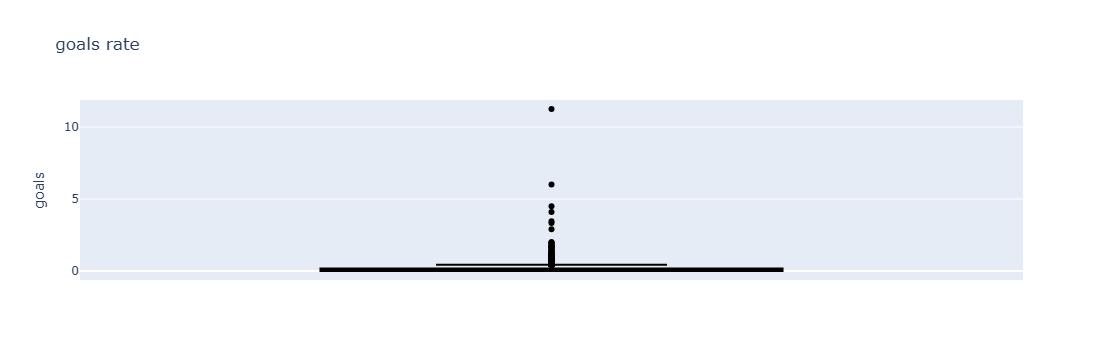

In [167]:
# Dealing with outliers for goal rates

import plotly.express as px
fig = px.box(df, y='goals', title='goals rate',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [168]:
df = df[df['goals'] < 1.2]

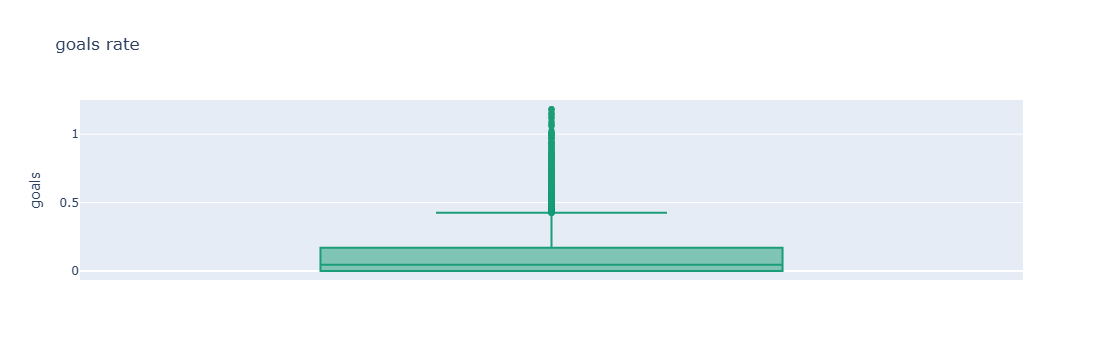

In [171]:
import plotly.express as px
fig = px.box(df, y='goals', title='goals rate',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

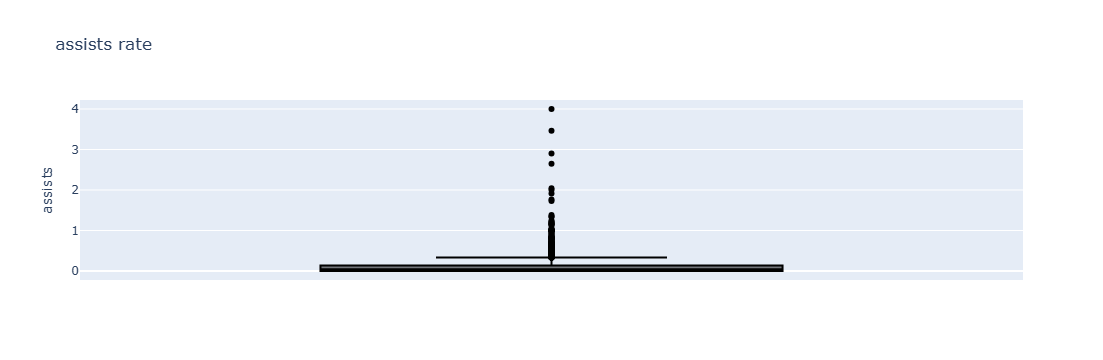

In [172]:
# Dealing with outliers for assists rates

import plotly.express as px
fig = px.box(df, y='assists', title='assists rate',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [174]:
df = df[df['assists'] < 0.6]

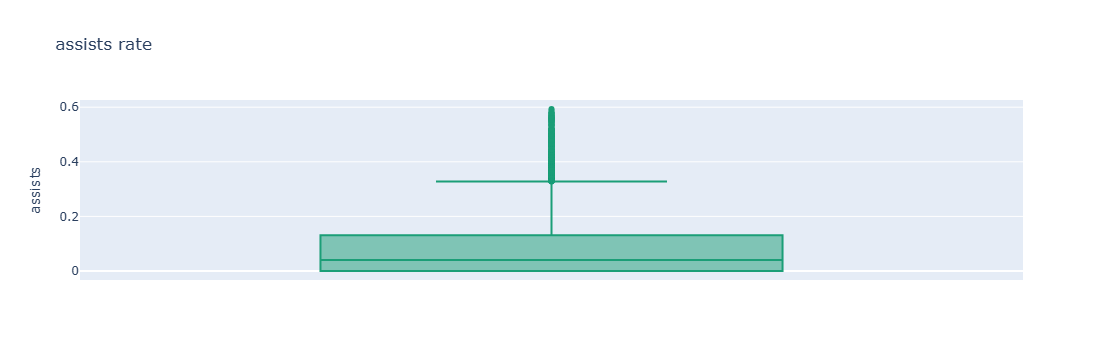

In [175]:

fig = px.box(df, y='assists', title='assists rate',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

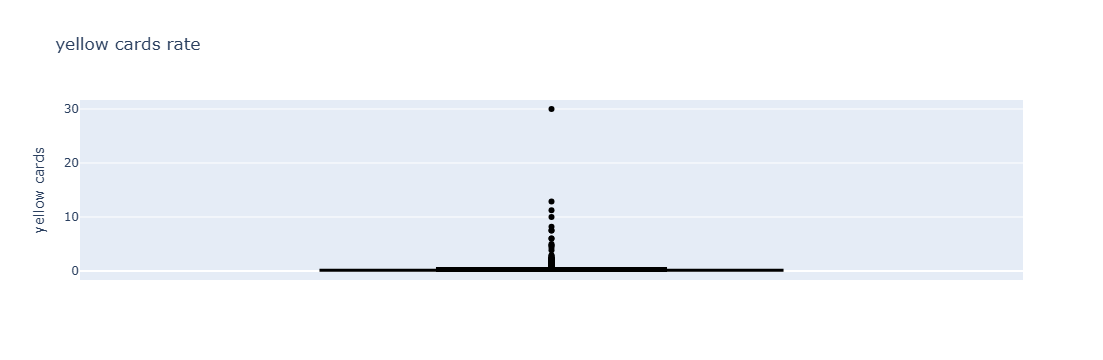

In [178]:
# Dealing with outliers for yellow cards

fig = px.box(df, y='yellow cards', title='yellow cards rate',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [179]:
df = df[df['yellow cards']<1]

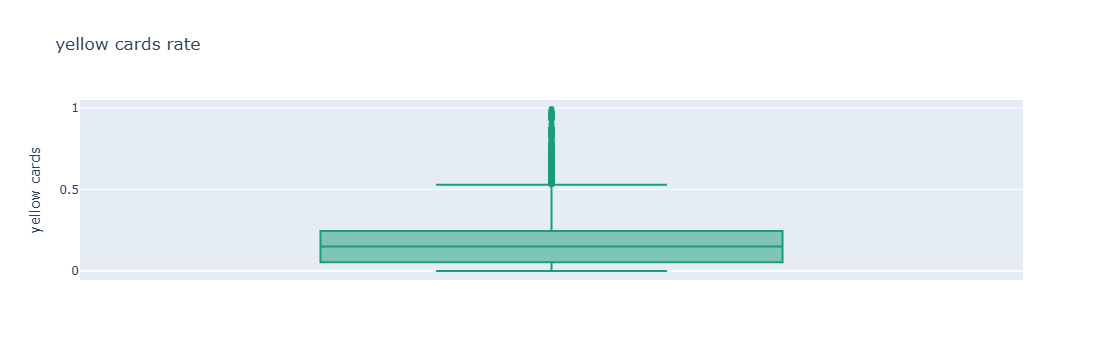

In [181]:
fig = px.box(df, y='yellow cards', title='yellow cards rate',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

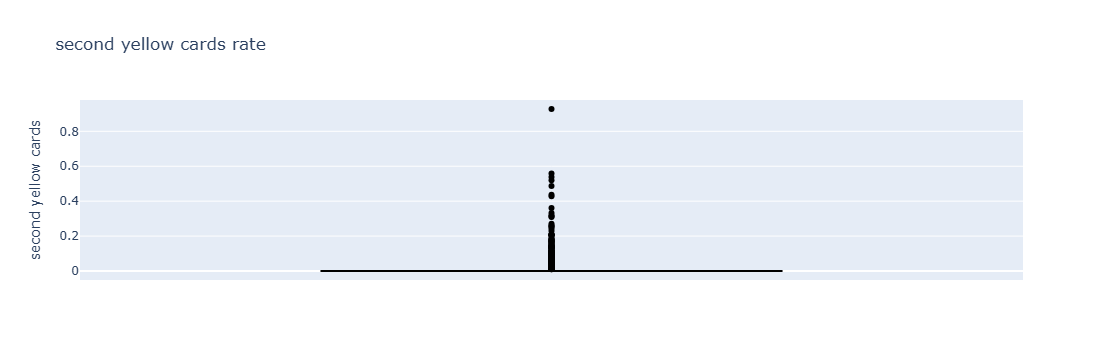

In [184]:
# Dealing with outliers for second yellow cards

fig = px.box(df, y='second yellow cards', title='second yellow cards rate',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [187]:
df = df[df['second yellow cards'] < .3]

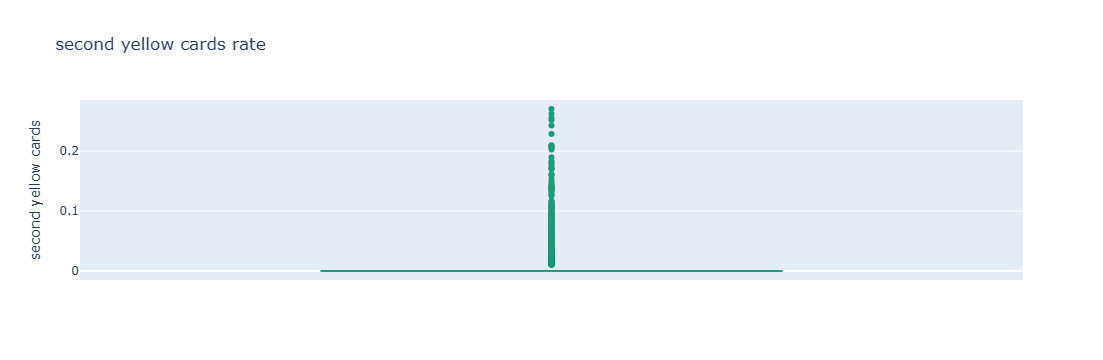

In [189]:
fig = px.box(df, y='second yellow cards', title='second yellow cards rate',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

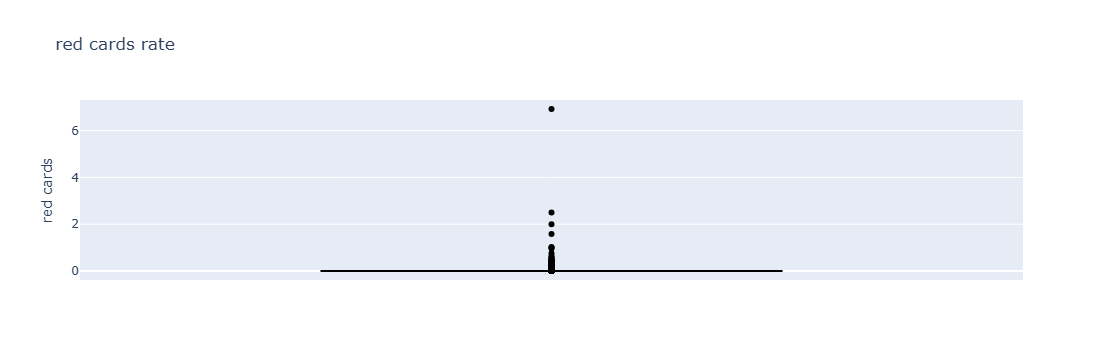

In [190]:
# Dealing with outliers for red cards

fig = px.box(df, y='red cards', title='red cards rate',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [192]:
df = df[df['red cards'] < 0.3]

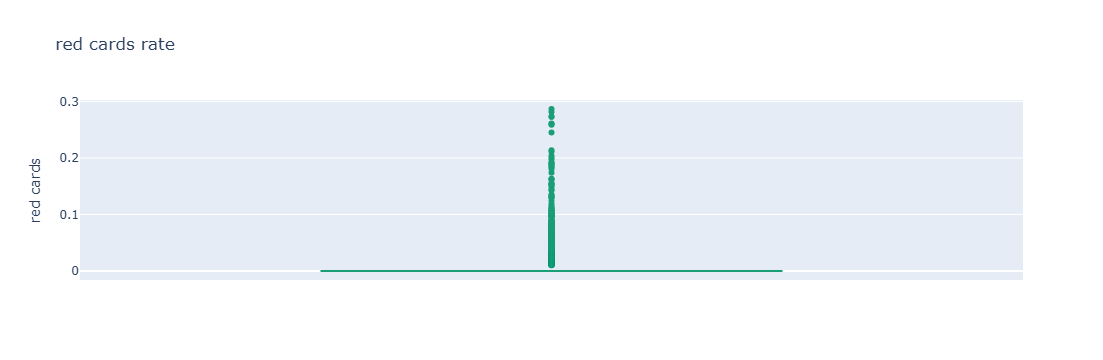

In [195]:
fig = px.box(df, y='red cards', title='red cards rate',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

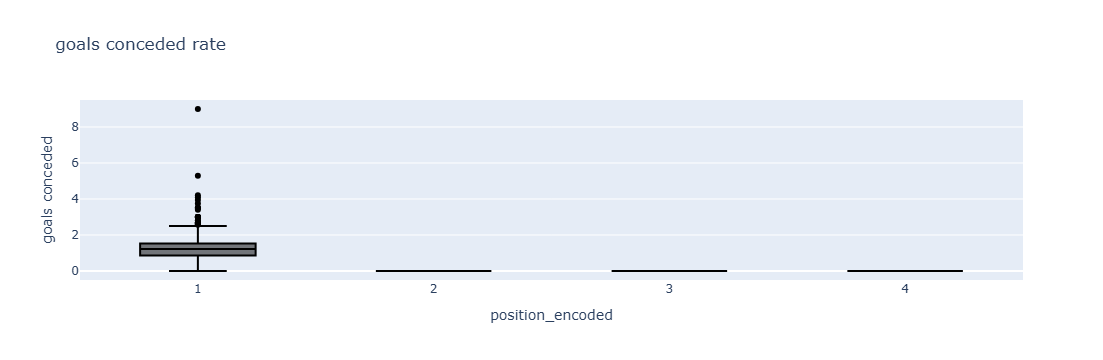

In [196]:
# Dealing with outliers for goals conceded

fig = px.box(df,x='position_encoded' ,y='goals conceded', title='goals conceded rate',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [198]:
df = df[(df['goals conceded'] < 3 )]

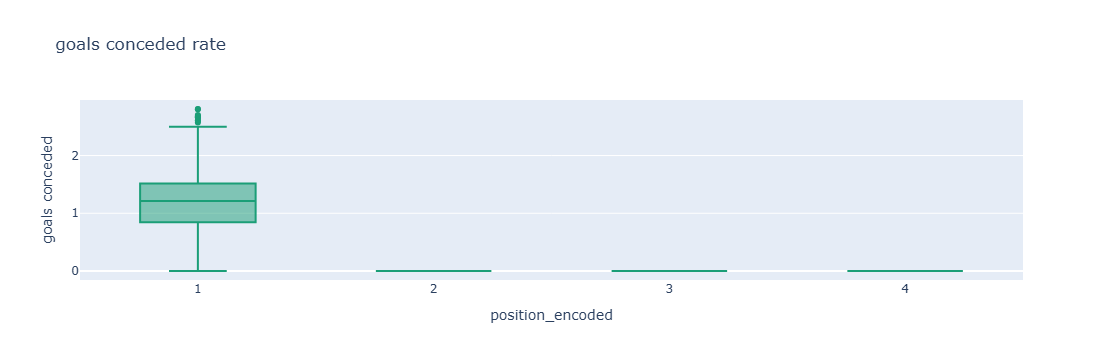

In [200]:
fig = px.box(df, x='position_encoded',y='goals conceded', title='goals conceded rate',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

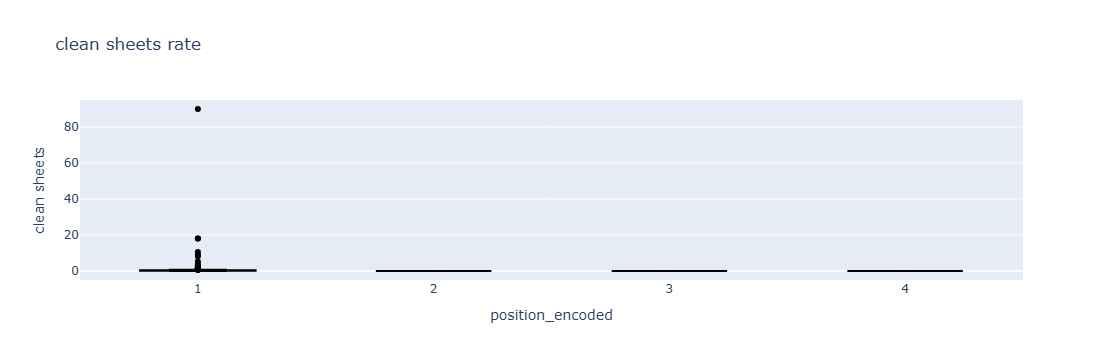

In [203]:
# Dealing with outliers for clean sheets	

fig = px.box(df,x= 'position_encoded', y='clean sheets', title='clean sheets rate',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [205]:
df = df[~((df['goals conceded'] > 0) & (df['clean sheets'] == 0) & (df['position_encoded'] == 1))]

In [208]:
df = df[~((df['clean sheets'] > .95) & (df['position_encoded'] == 1) & (df['position_encoded']< 10))]

In [210]:
df.shape

(10404, 20)

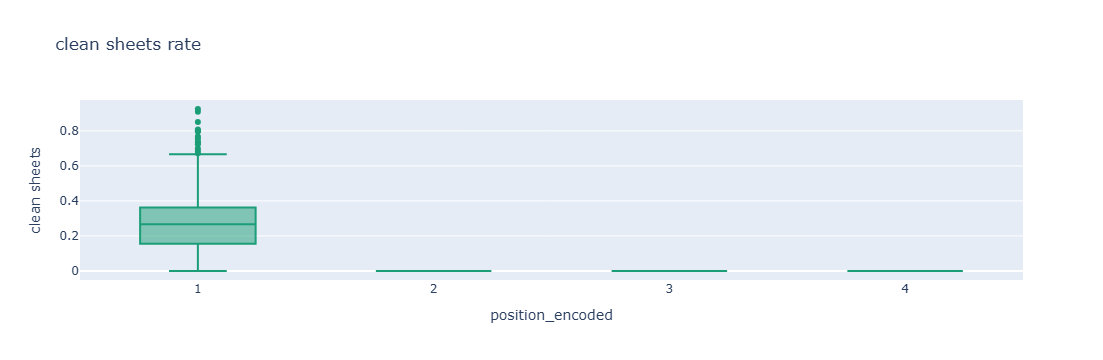

In [212]:
fig = px.box(df, x='position_encoded',y='clean sheets', title='clean sheets rate',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

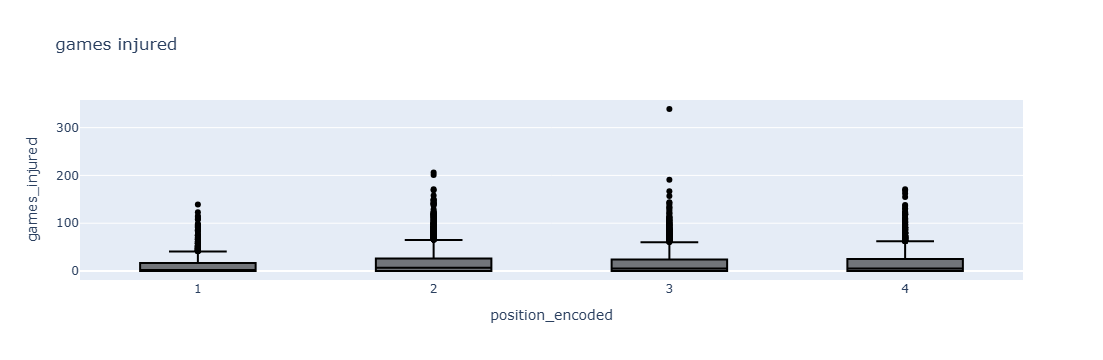

In [213]:
# Dealing with outliers for clean sheets	

fig = px.box(df,x= 'position_encoded', y='games_injured', title='games injured',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [216]:
df[df['games_injured'] > 100]

team                    position  height   age  \
7               Manchester United        Defender Centre-Back   185.0  31.0   
52                West Ham United       Attack Centre-Forward   177.0  30.0   
65                 Leicester City          Defender Left-Back   179.0  33.0   
128       Wolverhampton Wanderers       Attack Centre-Forward   200.0  25.0   
185    Brighton &amp; Hove Albion       Attack Centre-Forward   185.0  32.0   
...                           ...                         ...     ...   ...   
9896                Ulsan Hyundai          Attack-RightWinger   180.0  34.0   
10382        Mamelodi Sundowns FC  midfield-DefensiveMidfield   179.0  26.0   
10495       Newcastle United Jets         Defender Right-Back   185.0  31.0   
10652           Melbourne City FC        Defender Centre-Back   187.0  30.0   
10731    Western Sydney Wanderers        Defender Centre-Back   187.0  34.0   

       appearance     goals   assists  yellow cards  second yellow cards  \
7               8  0.000000  0.000000      0.216346             0.000000   
52             74  0.389610  0.229183      0.183346             0.000000   
65             12  0.000000  0.000000      0.221675             0.000000   
128            19  0.359760  0.299800      0.179880             0.000000   
185            64  0.316816  0.170593      0.000000             0.000000   
...           ...       ...       ...           ...                  ...   
9896           21  0.106383  0.106383      0.106383             0.000000   
10382          25  0.046851  0.000000      0.234253             0.000000   
10495          51  0.065486  0.021829      0.174630             0.000000   
10652          51  0.081633  0.040816      0.081633             0.020408   
10731           6  0.000000  0.000000      0.681818             0.000000   

       red cards  goals conceded  clean sheets  minutes played  days_injured  \
7       0.000000             0.0           0.0             416           932   
52      0.000000             0.0           0.0            3927           721   
65      0.000000             0.0           0.0             812           872   
128     0.000000             0.0           0.0            1501          1088   
185     0.000000             0.0           0.0            3693          1060   
...          ...             ...           ...             ...           ...   
9896    0.000000             0.0           0.0             846           623   
10382   0.000000             0.0           0.0            1921           896   
10495   0.021829             0.0           0.0            4123           779   
10652   0.000000             0.0           0.0            4410           670   
10731   0.000000             0.0           0.0             528          1307   

       games_injured  award  current_value  highest_value  position_encoded  \
7                169      7        2000000       20000000                 2   
52               116      2       16000000       22000000                 4   
65               129      4        1000000       20000000                 2   
128              119      0       18000000       25000000                 4   
185              168     11        8000000       18000000                 4   
...              ...    ...            ...            ...               ...   
9896             109      3         500000        7500000                 4   
10382            157      9         650000         850000                 3   
10495            149      2         450000        9000000                 2   
10652            114      2         550000         550000                 2   
10731            146      0         150000        2000000                 2   

       winger  
7           0  
52          0  
65          1  
128         0  
185         0  
...       ...  
9896        1  
10382       0  
10495       1  
10652       0  
10731       0  

[104 rows x 20 columns]

### I did not remove the outlier because of the games_injured effect on the current value so I want the model to catch this pattern if the injured increases the current value will decrease. 

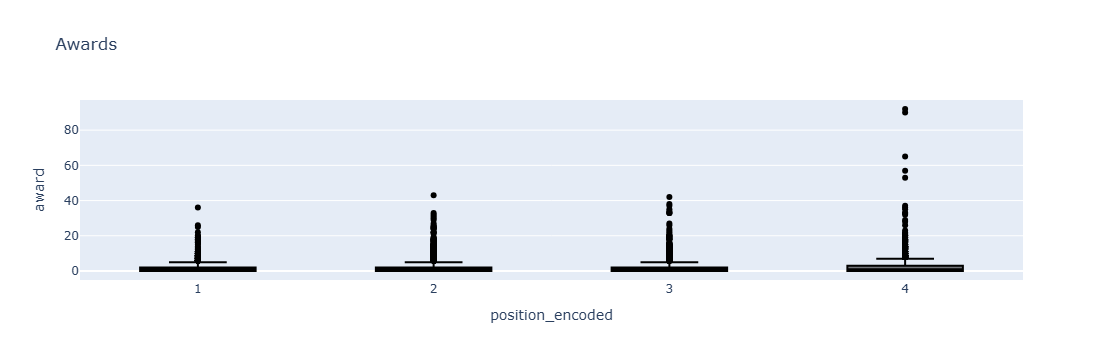

In [219]:
fig = px.box(df,x= 'position_encoded', y='award', title='Awards',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [220]:
df = df[df['award'] < 30]

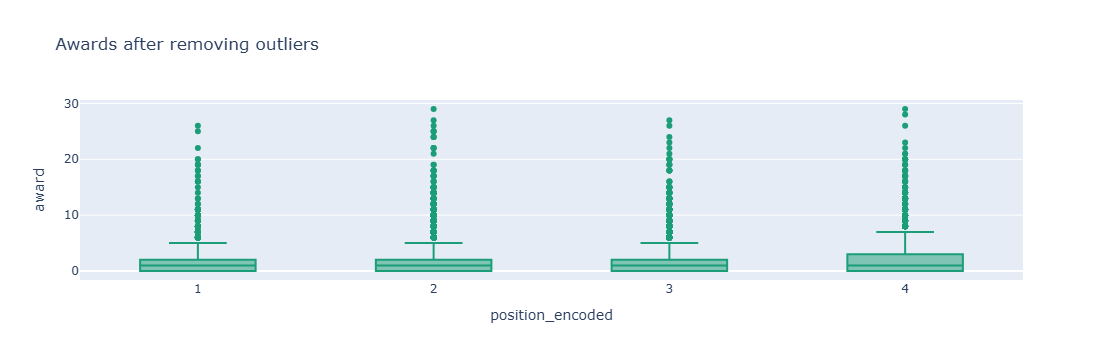

In [223]:
fig = px.box(df, x='position_encoded',y='award', title='Awards after removing outliers',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

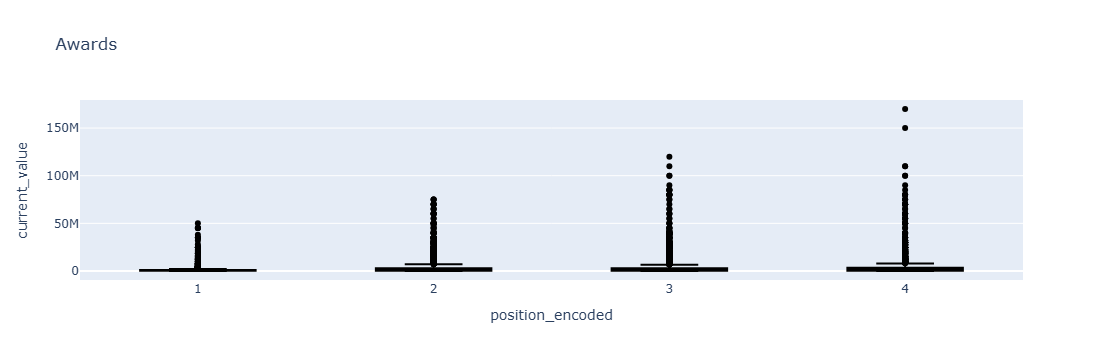

In [226]:
fig = px.box(df,x= 'position_encoded', y='current_value', title='Awards',color_discrete_sequence=px.colors.sequential.Blackbody)
fig.show()

In [228]:
df = df[~((df['current_value'] == 0) | (df['highest_value'] == 0))]

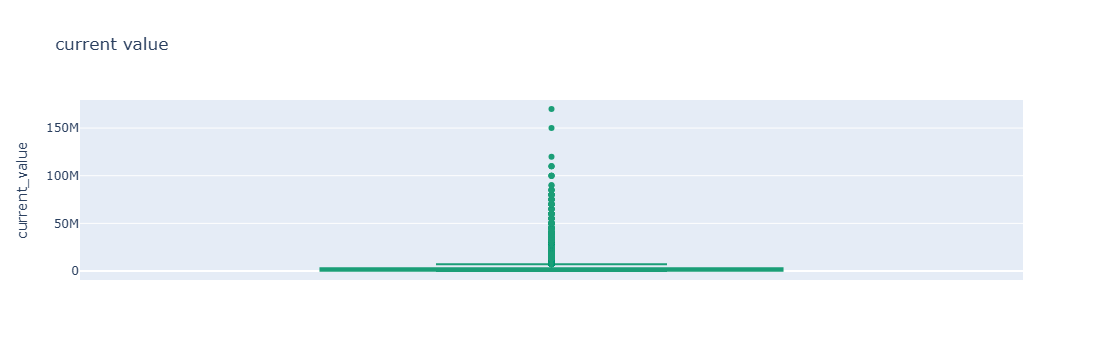

In [230]:
fig = px.box(df,y='current_value', title='current value',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

In [231]:
df = df[df['current_value'] >= 40000]

In [234]:
df = df[df['current_value'] <= 50000000]

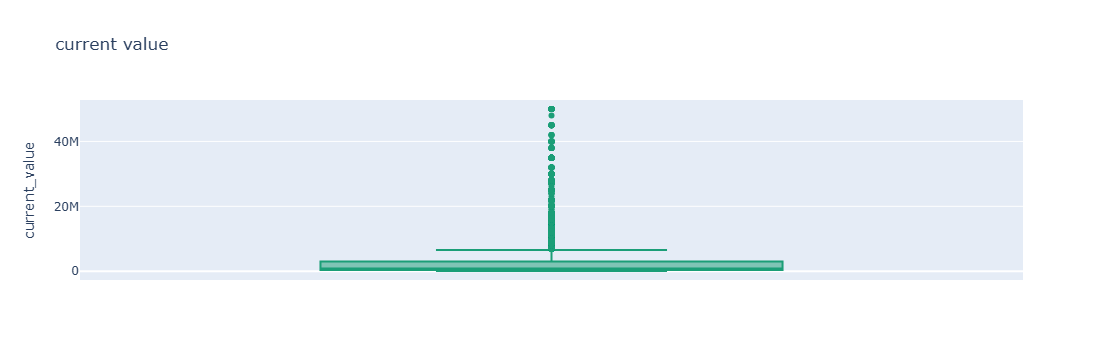

In [236]:
fig = px.box(df,y='current_value', title='current value',color_discrete_sequence=px.colors.colorbrewer.Dark2)
# Show the plot
fig.show()

In [238]:
df.shape

(9909, 20)

In [240]:
df.describe()

height          age   appearance        goals      assists  \
count  9909.000000  9909.000000  9909.000000  9909.000000  9909.000000   
mean    181.239563    26.167647    38.145827     0.122892     0.082722   
std       6.982140     4.654434    25.725701     0.172860     0.102818   
min     156.000000    15.000000     0.000000     0.000000     0.000000   
25%     176.000000    22.000000    14.000000     0.000000     0.000000   
50%     181.240353    26.000000    38.000000     0.052250     0.047211   
75%     186.000000    30.000000    59.000000     0.178660     0.134904   
max     206.000000    42.000000   107.000000     1.184211     0.593407   

       yellow cards  second yellow cards    red cards  goals conceded  \
count   9909.000000          9909.000000  9909.000000     9909.000000   
mean       0.174061             0.004282     0.004790        0.115612   
std        0.146870             0.016507     0.017190        0.386382   
min        0.000000             0.000000     0.000000        0.000000   
25%        0.067399             0.000000     0.000000        0.000000   
50%        0.155709             0.000000     0.000000        0.000000   
75%        0.248902             0.000000     0.000000        0.000000   
max        0.994475             0.270270     0.286624        2.800000   

       clean sheets  minutes played  days_injured  games_injured        award  \
count   9909.000000     9909.000000   9909.000000    9909.000000  9909.000000   
mean       0.027398     2586.299425    122.310021      16.362600     1.891916   
std        0.095878     1972.295986    177.717170      23.649861     3.063077   
min        0.000000        0.000000      0.000000       0.000000     0.000000   
25%        0.000000      846.000000      0.000000       0.000000     0.000000   
50%        0.000000     2284.000000     44.000000       6.000000     1.000000   
75%        0.000000     4051.000000    187.000000      25.000000     2.000000   
max        0.924658     9510.000000   2349.000000     339.000000    29.000000   

       current_value  highest_value  position_encoded       winger  
count   9.909000e+03   9.909000e+03       9909.000000  9909.000000  
mean    3.246311e+06   5.726741e+06          2.727016     0.313251  
std     6.331741e+06   1.085100e+07          0.971255     0.463839  
min     5.000000e+04   5.000000e+04          1.000000     0.000000  
25%     3.500000e+05   5.000000e+05          2.000000     0.000000  
50%     8.500000e+05   1.500000e+06          3.000000     0.000000  
75%     3.000000e+06   5.500000e+06          4.000000     1.000000  
max     5.000000e+07   1.500000e+08          4.000000     1.000000

## Feature Engineering

In [103]:
p35 = df['current_value'].quantile(0.50)
p75 = df['current_value'].quantile(0.90)

# Function to categorize prices
def categorize_price(price):
    if price < p35:
        return 'Low Price'
    elif price < p75:
        return 'Good Price'
    else:
        return 'High Price'

# Apply the function to create a new column
df['value_category'] = df['current_value'].apply(categorize_price)

df.drop('current_value', axis=1, inplace=True)

# Verify the distribution of the new categories
print(df['value_category'].value_counts())

value_category
Low Price     4924
Good Price    3985
High Price    1000
Name: count, dtype: int64


In [242]:
from sklearn.preprocessing import LabelEncoder

In [244]:
encoder = LabelEncoder()
df['price_category_encoded'] = encoder.fit_transform(df['value_category'])  

KeyError: 'value_category'

In [246]:
ft_eng = df.loc[:,['team','height','age','goals','assists','yellow cards', 'second yellow cards','red cards','goals conceded','clean sheets','minutes played','games_injured','award','price_category_encoded',"highest_value",'position_encoded', 'winger']]

KeyError: "['price_category_encoded'] not in index"

In [112]:
ft_eng.head()

team  height   age     goals   assists  yellow cards  \
0  Manchester United   189.0  32.0  0.000000  0.000000      0.009585   
1  Manchester United   196.0  30.0  0.000000  0.000000      0.069018   
2  Manchester United   188.0  37.0  0.000000  0.000000      0.000000   
3  Manchester United   175.0  25.0  0.028090  0.056180      0.224719   
4  Manchester United   191.0  30.0  0.017889  0.017889      0.053667   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   
1                  0.0        0.0        1.242331      0.207055   
2                  0.0        0.0        0.616438      0.924658   
3                  0.0        0.0        0.000000      0.000000   
4                  0.0        0.0        0.000000      0.000000   

   minutes played  games_injured  award  price_category_encoded  \
0            9390              5     13                       1   
1            1304             58      1                       0   
2             292             84      4                       2   
3            6408             22      9                       1   
4            5031             51     21                       1   

   highest_value  position_encoded  winger  
0       70000000                 1       0  
1       22000000                 1       0  
2        6000000                 1       0  
3       50000000                 2       0  
4       80000000                 2       0

In [114]:
corr1 = ft_eng.drop(['team'], axis=1)

In [116]:
corr_1 = corr1.corr()

<Axes: >

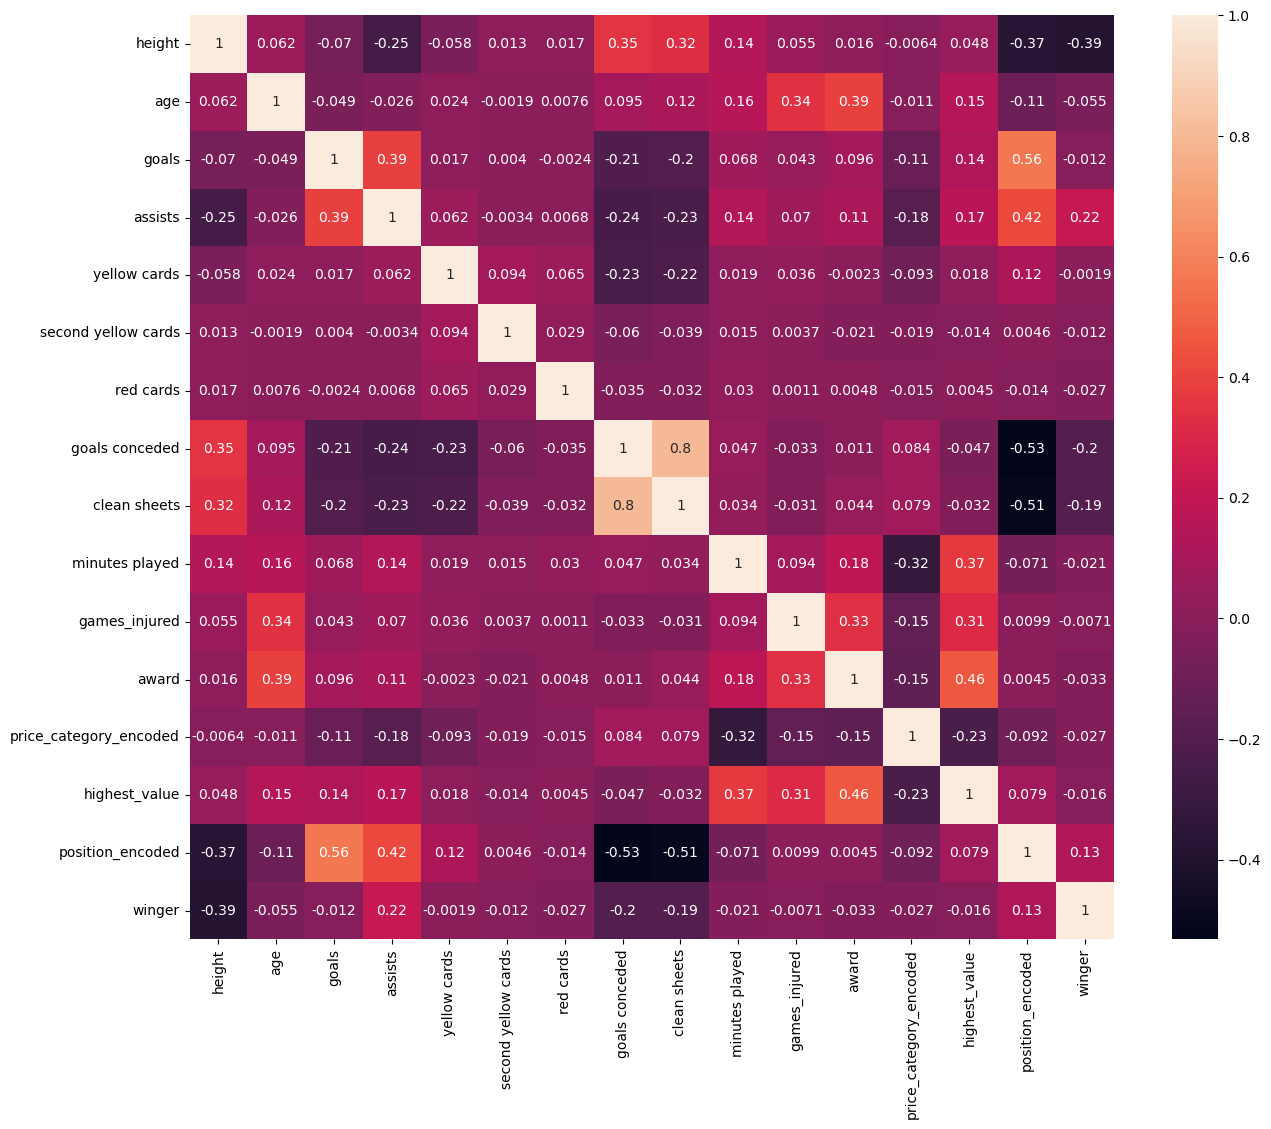

In [118]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,12)
sns.heatmap(corr_1,square = True, annot = True)

In [120]:
categ_team = ['team']

In [122]:
encoding = pd.get_dummies(ft_eng, columns=categ_team)

In [124]:
encoding.shape

(9909, 390)

## Feature selection

In [127]:
correlation = encoding.corr()
print(correlation['price_category_encoded'].sort_values(ascending=False))

price_category_encoded       1.000000
goals conceded               0.084226
clean sheets                 0.078923
team_Daejeon Hana Citizen    0.061847
team_Daegu FC                0.058514
                               ...   
games_injured               -0.145051
award                       -0.151969
assists                     -0.175332
highest_value               -0.231949
minutes played              -0.322500
Name: price_category_encoded, Length: 390, dtype: float64


In [128]:
threshold = 0.10 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['price_category_encoded']) > threshold]['price_category_encoded'].index
selected_features

Index(['goals', 'assists', 'minutes played', 'games_injured', 'award',
       'price_category_encoded', 'highest_value'],
      dtype='object')

In [131]:
selected_features = ['goals', 'assists', 'minutes played', 'games_injured', 'award',
       'price_category_encoded', 'highest_value']

In [133]:
encoding = encoding[selected_features]

In [135]:
encoding.reset_index(drop=True,inplace=True)

In [137]:
encoding

goals   assists  minutes played  games_injured  award  \
0     0.000000  0.000000            9390              5     13   
1     0.000000  0.000000            1304             58      1   
2     0.000000  0.000000             292             84      4   
3     0.028090  0.056180            6408             22      9   
4     0.017889  0.017889            5031             51     21   
...        ...       ...             ...            ...    ...   
9904  0.226700  0.000000            1588              0      0   
9905  0.175953  0.087977            1023              0      0   
9906  0.372671  0.186335            1449             18      0   
9907  0.375000  0.000000             960              0      0   
9908  0.312139  0.104046             865              0      0   

      price_category_encoded  highest_value  
0                          1       70000000  
1                          0       22000000  
2                          2        6000000  
3                          1       50000000  
4                          1       80000000  
...                      ...            ...  
9904                       2         200000  
9905                       2          75000  
9906                       2         300000  
9907                       2          50000  
9908                       2          50000  

[9909 rows x 7 columns]

## Import necessary libraries

In [248]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.cluster import KMeans


In [250]:
#df_k = df['goals conceded']

In [252]:
df_k = df[['position_encoded', 'current_value', 'goals','assists','goals conceded']]

In [262]:
# Prepare data
X = df_k.drop(['position_encoded'], axis=1)
y = df_k['position_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)


In [270]:
# sacle the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [272]:
X_train.shape

(7927, 4)

In [274]:
X_test.shape

(1982, 4)

## Build Classification Model

In [268]:

model = KMeans()


In [276]:
wcss = []
for i in range(1, 20):  # Test 1 to 10 clusters
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS

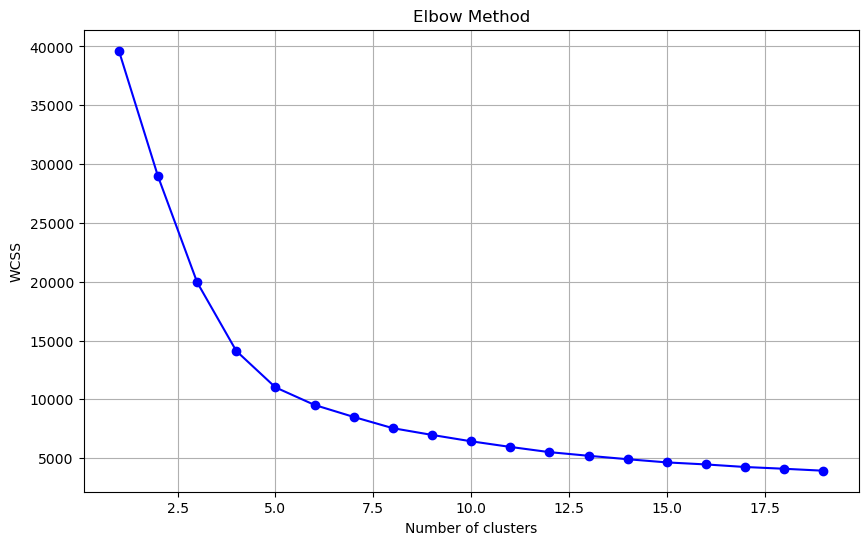

In [278]:
# 3. Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), wcss,  marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [324]:
# Optional: Apply k-Means using the optimal number of clusters
optimal_clusters = 3 # This might change based on your actual elbow curve analysis
model = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

In [326]:
y_pred = model.fit_predict(X_scaled)

In [327]:
X.head(2)


current_value  goals  assists  goals conceded  kmeans
0       15000000    0.0      0.0        1.217252       0
1        1500000    0.0      0.0        1.242331       0

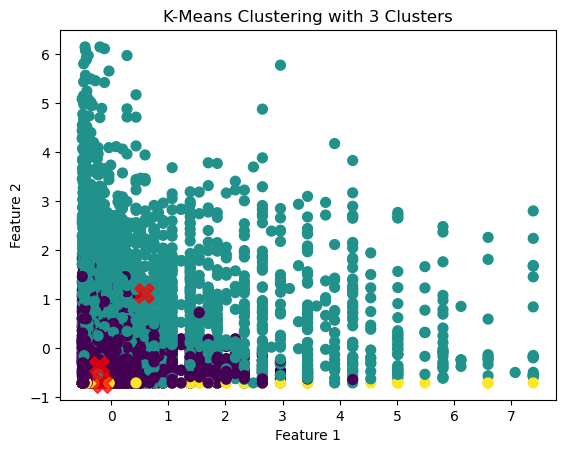

In [328]:
# Plotting the clusters with optimal number
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with {optimal_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [329]:
X['kmeans'] = y_pred

In [332]:
X['kmeans'].value_counts()

kmeans
0    6365
1    2689
2     855
Name: count, dtype: int64

<Axes: xlabel='current_value', ylabel='goals'>

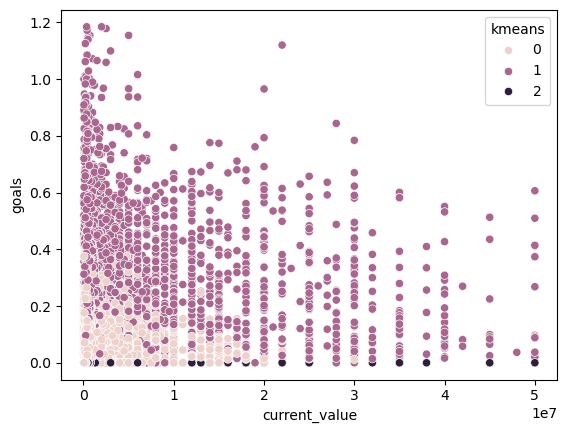

In [338]:
sns.scatterplot(data = X , x = 'current_value', y = 'goals', hue = 'kmeans')

<Axes: xlabel='goals', ylabel='current_value'>

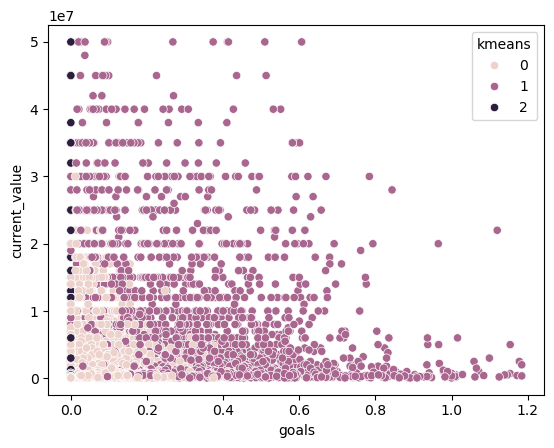

In [340]:
sns.scatterplot(data = X , x = 'goals', y = 'current_value', hue = 'kmeans')

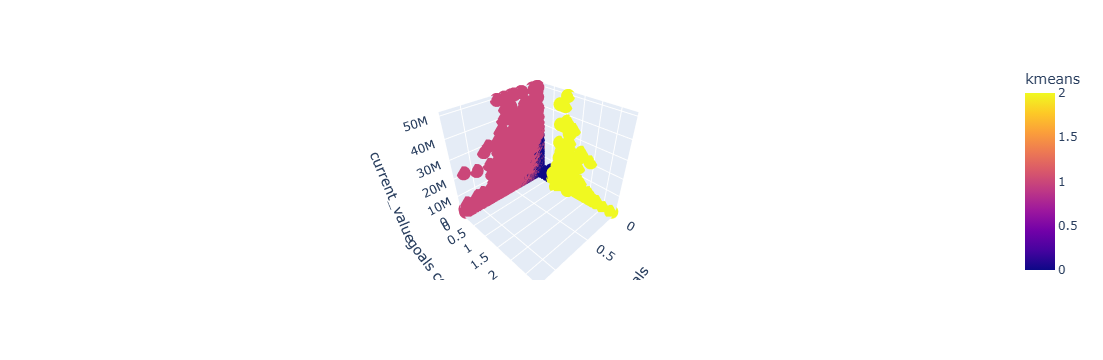

In [342]:
import plotly
import plotly.express as px

fig = px.scatter_3d(X, x='goals', y='goals conceded', z='current_value',
              color='kmeans')
fig.show()

## Accuracy

### - SVM

In [169]:
y_pred_train_rf_g = best_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train_rf_g)
accuracy

0.8400403683612968

In [173]:
y_pred_train_svc = best_model.predict(X_train)
y_pred_test_svc = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_pred_train_svc)
test_accuracy = accuracy_score(y_test, y_pred_test_svc)

print(f"Train accuracy:{round(train_accuracy,3)*100}%")
print(f"Test accuracy:{round(test_accuracy,3)*100}%")

Train accuracy:84.0%
Test accuracy:81.0%


## confusion Matrix

In [176]:
conf_matrix = confusion_matrix(y_test, y_pred_test_svc)
conf_matrix

array([[689,  43,  52],
       [ 46, 151,   1],
       [232,   3, 765]], dtype=int64)

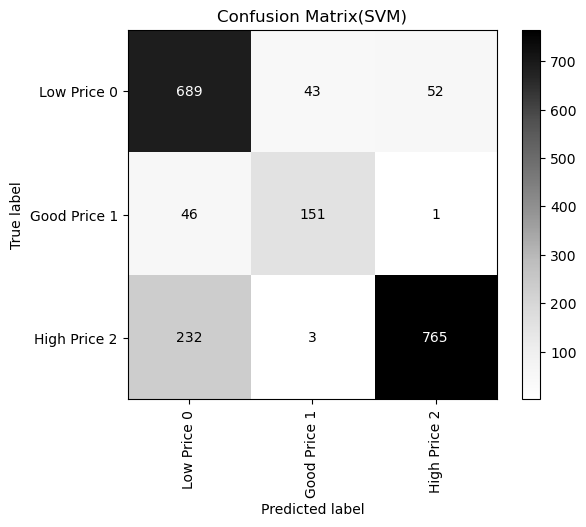

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
labels = ["Low Price 0", "Good Price 1", "High Price 2"]
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_svc,
                                        display_labels=labels,
                                        cmap="Greys",
                                        xticks_rotation='vertical',
                                       )
plt.title('Confusion Matrix(SVM)')
plt.show()